# IFT6390 Project - Data Exploration snippets

## Useful piece of code

## Setup - data

In [90]:
print(__doc__)

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
#Natural Language Toolkit
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#identifies words which are not adding semantic value to the sentence
stopw = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/rd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import cleaned dataframe

In [14]:
a=datetime.datetime.now().second

s140=pd.read_pickle('data/s140_clean_28nov.pkl')
mr=pd.read_pickle('data/mr_clean_28nov.pkl')
cc=pd.read_pickle('data/cc_clean_28nov.pkl')

a=datetime.datetime.now().second-a
print(a//60,'min',a%60,'sec')

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer 

def make_tfidf(df):
    tf_vect=TfidfVectorizer(use_idf=False,stop_words=stopw)
    tf=tf_vect.fit_transform(df.tolist())
    
    l=tf.shape[0]
    
    w_count=np.array(tf.sum(axis=0,))[0]/l
    #wcm=w_count.max()
    #w_count=w_count/wcm
    wcr=w_count.argsort()[::-1].argsort()

    
    idf_vect=TfidfVectorizer(use_idf=True,stop_words=stopw)
    idf=idf_vect.fit_transform(df.tolist())
    
    w_marker=np.array(idf.sum(axis=0))[0]/l
    #wmm=w_marker.max()
    #w_marker=w_marker/wmm
    wmr=w_marker.argsort()[::-1].argsort()
    
    
    # SRC -> https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/
    feature_names=tf_vect.get_feature_names()
    
    tf_idf = pd.DataFrame(np.array([w_count, w_marker, wcr, wmr]).T, index=feature_names, columns=["tf", "idf", "rank_tf", "rank_idf"])
    tf_idf = tf_idf.sort_values(by=["tf"],ascending=False)

    tf_idf.rank_tf=tf_idf.rank_tf.astype('int64')
    tf_idf.rank_idf=tf_idf.rank_idf.astype('int64')

    return tf_idf


In [16]:
import sys
!{sys.executable} -m pip install scikit-plot

import scikitplot#.plotters as skplt

## Transform s140

In [17]:
#all=make_tfidf(s140['trimmed'])

In [20]:
a=datetime.datetime.now().second

tf_idf_vect=TfidfVectorizer(use_idf=True,stop_words=stopw)
s140_tf_idf=tf_idf_vect.fit_transform(s140['trimmed'].tolist())

a=datetime.datetime.now().second-a
print(a//60,'min',a%60,'sec')

25 min 0 sec


## Transform MR

In [21]:
a=datetime.datetime.now().second

tf_idf_vect=TfidfVectorizer(use_idf=True,stop_words=stopw)
mr_tf_idf=tf_idf_vect.fit_transform(mr['trimmed'].tolist())

a=datetime.datetime.now().second-a
print(a//60,'min',a%60,'sec')

0 min 7 sec


## Transform CC

In [22]:
a=datetime.datetime.now().second

tf_idf_vect=TfidfVectorizer(use_idf=True,stop_words=stopw)
cc_tf_idf=tf_idf_vect.fit_transform(cc['trimmed'].tolist())

a=datetime.datetime.now().second-a
print(a//60,'min',a%60,'sec')

0 min 0 sec


## Model testing

In [133]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#The mean score and the 95% confidence interval of the score estimate are hence given by:

def crossval(model, x, y):    
    scores = cross_val_score(model, x, y, cv=5)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

def confusion(y_valid,predicted):
    scikitplot.metrics.plot_confusion_matrix(y_valid, predicted,x_tick_rotation=90,figsize=(2,6))#, normalize=True)
    plt.show()  
    
class model:
    def train(mdl, xt, yt,xv=0,yv=0, selfie=True):  
        if selfie:
            X_train, X_valid, y_train, model.y_valid = train_test_split(x, y, test_size=0.20, random_state=42)
        else:
            X_train, X_valid, y_train, model.y_valid=xt,xv,yt,yv

        model.clf = mdl.fit(X_train, y_train)

    def predict(x):
        predicted= model.clf.predict(X_valid)

        acc=accuracy_score(model.y_valid, predicted)
        print(f"Accuracy: {acc}")

        confusion(model.y_valid,predicted)


        return model.y_valid,predicted
     
        

## Trained and tested on the same dataset (selfie)

### mr

In [135]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import svm

a=datetime.datetime.now()

#x,y = s140_tf_idf, s140['target']
x,y = mr_tf_idf, mr['target']
#x,y = cc_tf_idf, cc['target']

mdl=MLPClassifier(alpha=0.0025, max_iter=10,epsilon=1e-03,verbose=True)
model.train(mdl, x, y)
y_val,pred=model.predict(x)

print(datetime.datetime.now()-a)

#TryModel(MultinomialNB(), x, y)
#TryModel(linear_model.SGDClassifier(max_iter=1000, tol=1e-3), x, y)

#TryModel(AdaBoostClassifier(DecisionTreeClassifier(max_depth=10)), x, y)
#vch = VotingClassifier(estimators=[('NB25', clf1), ('SGDp', clf2), ('SGDlog', clf3),('NB35', clf4)], voting='hard')
#vcs = VotingClassifier(estimators=[('NB10', clf1), ('SGD', clf2), ('SGDlog', clf3),('NB35', clf4)], voting='soft')
#TryModel(svm.SVC(kernel='linear', C=1), x, y)


Iteration 1, loss = 0.68650160
Iteration 2, loss = 0.62485014
Iteration 3, loss = 0.48595317
Iteration 4, loss = 0.36892265
Iteration 5, loss = 0.30426854
Iteration 6, loss = 0.26649724
Iteration 7, loss = 0.24001248
Iteration 8, loss = 0.21946894
Iteration 9, loss = 0.20281459
Iteration 10, loss = 0.18799734


/home/rd/miniconda3/envs/UdeM/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NameError: name 'X_valid' is not defined

### cc

In [76]:
import numpy as np
print('NaN before replace: ', cc.target.isna().sum())
cc=cc.replace({'target': {np.nan: 'Not Sure'}})
print('NaN after replace: ', cc.target.isna().sum())

NaN before replace:  0
NaN after replace:  0


,text,confidence,target,lemma,length,trimmed,old_target
0,Global warming report urges governments to act...,1.0000,positive,"[global, warming, report, urge, government, ac...",14,global warming report urge government act|brus...,Yes
1,Fighting poverty and global warming in Africa ...,1.0000,positive,"[fighting, poverty, global, warming, africa, l...",6,fighting poverty global warming africa link,Yes
2,Carbon offsets: How a Vatican forest failed to...,0.8786,positive,"[carbon, offset, vatican, forest, failed, redu...",9,carbon offset vatican forest failed reduce glo...,Yes
3,Carbon offsets: How a Vatican forest failed to...,1.0000,positive,"[carbon, offset, vatican, forest, failed, redu...",9,carbon offset vatican forest failed reduce glo...,Yes
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,0.8087,positive,"[uruguay, tool, needed, vulnerable, climate, c...",7,uruguay tool needed vulnerable climate change ...,Yes
...,...,...,...,...,...,...,...
6022,"@bloodless_coup ""The phrase 'global warming' s...",1.0000,positive,"[bloodless_coup, ``, phrase, 'global, warming,...",15,bloodless_coup `` phrase 'global warming aband...,Y
6023,Virginia to Investigate Global Warming Scienti...,1.0000,Not Sure,"[virginia, investigate, global, warming, scien...",7,virginia investigate global warming scientist ...,NaN
6024,Global warming you tube parody you will enjoy ...,0.6411,negative,"[global, warming, tube, parody, enjoy, ipcc, o...",8,global warming tube parody enjoy ipcc ocra _li...,N
6025,One-Eyed Golfer: Don't dare tell me about glob...,1.0000,negative,"[one-eyed, golfer, n't, dare, tell, global, wa...",14,one-eyed golfer n't dare tell global warming t...,N


Iteration 1, loss = 1.11586085
Iteration 2, loss = 1.03575056
Iteration 3, loss = 0.97225541
Iteration 4, loss = 0.92590104
Iteration 5, loss = 0.87330756
Iteration 6, loss = 0.81331527
Iteration 7, loss = 0.74895716
Iteration 8, loss = 0.68652827
Iteration 9, loss = 0.62772460
Iteration 10, loss = 0.57547344
Iteration 11, loss = 0.52720712
Iteration 12, loss = 0.48440689
Iteration 13, loss = 0.44594514
Iteration 14, loss = 0.41191069
Iteration 15, loss = 0.38055456
Iteration 16, loss = 0.35256312
Iteration 17, loss = 0.32731850
Iteration 18, loss = 0.30466064
Iteration 19, loss = 0.28434784
Iteration 20, loss = 0.26603804
Iteration 21, loss = 0.25027555
Iteration 22, loss = 0.23657198
Iteration 23, loss = 0.22458270
Iteration 24, loss = 0.21266385
Iteration 25, loss = 0.20281020
Iteration 26, loss = 0.19450147
Iteration 27, loss = 0.18619416
Iteration 28, loss = 0.17878508
Iteration 29, loss = 0.17281907
Iteration 30, loss = 0.16647470
Iteration 31, loss = 0.16117148
Iteration 32, los

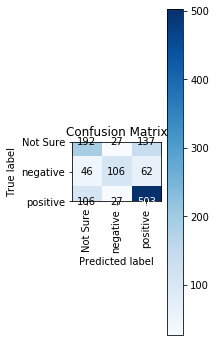

-1 min 33 sec


In [94]:
a=datetime.datetime.now()

#x,y = s140_tf_idf, s140['target']
#x,y = mr_tf_idf, mr['target']
x,y = cc_tf_idf, cc['target']

TryModel(MLPClassifier(alpha=0.0025, max_iter=50,epsilon=1e-03,verbose=True), x, y)

print(datetime.datetime.now()-a)

### s140

/home/rd/miniconda3/envs/UdeM/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.7692158700406123


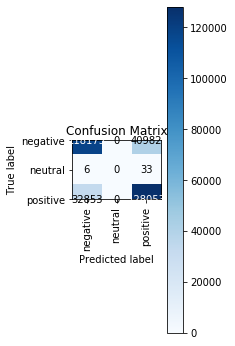

0:59:29.749774


In [131]:
a=datetime.datetime.now()

x,y = s140_tf_idf, s140['target']
#x,y = mr_tf_idf, mr['target']
#x,y = cc_tf_idf, cc['target']

TryModel(MLPClassifier(alpha=0.0025, max_iter=5,epsilon=1e-03,verbose=True), x, y)

print(datetime.datetime.now()-a)

## MLP Movies trained w S140

In [ ]:
a=datetime.datetime.now()

#x,y = s140_tf_idf, s140['target']
#x,y = mr_tf_idf, mr['target']
x_train,y_train = cc_tf_idf, cc['target']

TryModel(MLPClassifier(alpha=0.0025, max_iter=25,epsilon=1e-03,verbose=True), x_train, y_train, x_valid, y_valid)

print(datetime.datetime.now()-a)